In [1]:
import sys
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pycgp_finalclass.CGP import CGP
from pycgp_finalclass.Config import CGPConfig
from pycgp_finalclass.ES import ES
from pycgp_finalclass.Evaluator import EvaluatorSin, Binary_Classifier, Regressor
from pycgp_finalclass.Node import Node
from pycgp_finalclass.Mutation import Proba_Mutation, Golden_mutation
from pycgp_finalclass.Function import Func
from pycgp_finalclass.Function_library import *
from pycgp_finalclass.Genome import CGPGenome


In [2]:
def build_funcLib(): #Define the function used
    return [Func(f_sum, 'sum', 2, 0),
            Func(f_aminus, 'aminus', 2, 0),
            Func(f_mult, 'mult', 2, 0),
            Func(f_exp, 'exp', 2, 0),
            Func(f_abs, 'abs', 1, 0),
            Func(f_sqrt, 'sqrt', 1, 0),
            Func(f_sqrtxy, 'sqrtxy', 2, 0),
            Func(f_squared, 'squared', 1, 0),
            Func(f_pow, 'pow', 2, 0),
            #Func(f_one, 'one', 0, 0),
            Func(f_zero, 'zero', 0, 0),
            #Func(f_const, 'const', 0, 1),
            Func(f_inv, 'inv', 1, 0),
            Func(f_gt, 'gt', 2, 0),
            Func(f_asin, 'asin', 1, 0),
            Func(f_acos, 'acos', 1, 0),
            Func(f_atan, 'atan', 1, 0),
            Func(f_sin, 'sin', 1, 0),
            Func(f_min, 'min', 2, 0),
            Func(f_max, 'max', 2, 0),
            Func(f_round, 'round', 1, 0),
            Func(f_floor, 'floor', 1, 0),
            Func(f_ceil, 'ceil', 1, 0)
            ]
functions = build_funcLib()

In [3]:
#In development
""" from scipy.io import arff
import pandas as pd

# Load the .arff file
data, meta = arff.loadarff("datasets/Colon_fixed.arff")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If string columns are returned as bytes, decode them
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# Replace "relapse" with 1 and "non-relapse" with 0 in the 'Class' column
df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


from sklearn.preprocessing import MinMaxScaler

# Séparation des features et de la cible
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Conversion des colonnes en float
X = X.astype(float)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

evaluator2 = Binary_Classifier(X, y) """

' from scipy.io import arff\nimport pandas as pd\n\n# Load the .arff file\ndata, meta = arff.loadarff("datasets/Colon_fixed.arff")\n\n# Convert to pandas DataFrame\ndf = pd.DataFrame(data)\n\n# If string columns are returned as bytes, decode them\nfor col in df.select_dtypes([object]).columns:\n    df[col] = df[col].str.decode(\'utf-8\')\n\n# Replace "relapse" with 1 and "non-relapse" with 0 in the \'Class\' column\ndf[\'class\'] = df[\'class\'].replace({\'Tumor\': 1, \'Normal\': 0})\n\n\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Séparation des features et de la cible\nX = df.drop(\'class\', axis=1)  # Features\ny = df[\'class\']               # Target\n\n# Conversion des colonnes en float\nX = X.astype(float)\n\n# Standardisation avec MinMaxScaler dans l\'intervalle [-1, 1]\nscaler = MinMaxScaler(feature_range=(-1, 1))\nX = scaler.fit_transform(X)\n\nevaluator2 = Binary_Classifier(X, y) '

In [4]:




#Initialise config + Evaluator + mutation 
CGP_config = CGPConfig(num_inputs=1, num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

#mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.1)

evaluator1 = EvaluatorSin()

#Test purpose
genome_cgp = CGPGenome.create_genome(CGP_config)
active_nodes = genome_cgp.get_active_nodes()
print("Active nodes:", active_nodes)



Active nodes: [<pycgp_finalclass.Node.Node object at 0x000001CA17DC4F80>, <pycgp_finalclass.Node.Node object at 0x000001CA3172F4D0>, <pycgp_finalclass.Node.Node object at 0x000001CA3187C350>]


Starting fitness 0.1710
Early stopping at generation 142 (no improvement for 100 generations).

Best fitness achieved: 1.0000
n1 = min(x0, x0)
n2 = exp(n1, n1)
n3 = sin(n1)
n4 = ceil(n3)
n5 = zero()
n6 = sum(n5, n3)
n7 = atan(n2)
n8 = ceil(n7)
n9 = round(n5)
n10 = exp(n9, n3)
n11 = ceil(n1)
n12 = mult(n1, n11)
n13 = aminus(n11, n5)
n14 = round(n5)
n15 = pow(n14, n9)
n16 = exp(n15, x0)
n17 = round(x0)
n18 = squared(n6)
n19 = sum(n13, n3)
n20 = mult(n1, n13)
n21 = floor(x0)
n22 = squared(n11)
n23 = exp(n7, n15)
n24 = asin(n10)
n25 = min(x0, n5)
n26 = min(n19, n11)
n27 = zero()
n28 = inv(x0)
n29 = squared(n25)
n30 = sum(n18, n22)
Output: n3

Unrolled output expression:
sin(min(x0, x0))


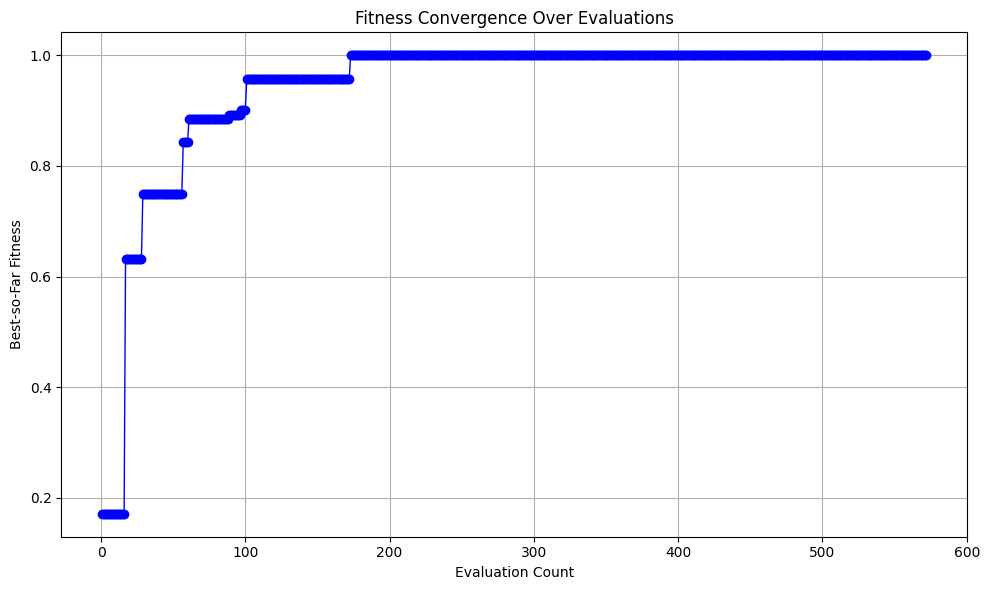

c:\Users\pauls\Bureau\Cours_2IS_M2\stage\pyCGP2.0\pycgp_finalclass\Genome.py:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


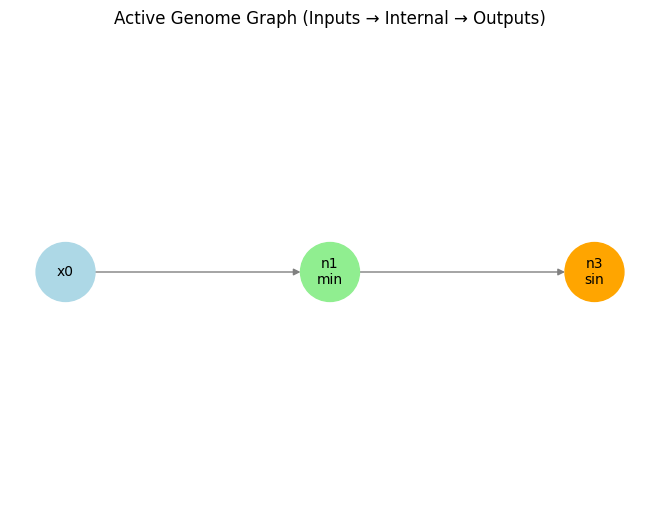

n1 = min(x0, x0)
n2 = exp(n1, n1)
n3 = sin(n1)
n4 = ceil(n3)
n5 = zero()
n6 = sum(n5, n3)
n7 = atan(n2)
n8 = ceil(n7)
n9 = round(n5)
n10 = exp(n9, n3)
n11 = ceil(n1)
n12 = mult(n1, n11)
n13 = aminus(n11, n5)
n14 = round(n5)
n15 = pow(n14, n9)
n16 = exp(n15, x0)
n17 = round(x0)
n18 = squared(n6)
n19 = sum(n13, n3)
n20 = mult(n1, n13)
n21 = floor(x0)
n22 = squared(n11)
n23 = exp(n7, n15)
n24 = asin(n10)
n25 = min(x0, n5)
n26 = min(n19, n11)
n27 = zero()
n28 = inv(x0)
n29 = squared(n25)
n30 = sum(n18, n22)
Output: n3

Unrolled output expression:
sin(min(x0, x0))


In [5]:
#Initialise the ES and run the evolution
ES_cgp = ES(evaluator1, lam=4, parent = CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=100)

print(best_genome.to_function_string())

#SR bench pour exemple de datasets pour symbolic regression
#add a visual graph that show the nodes
#convergency of fitness function per evaluation
#graphviz see previous pycgp code
#For presentation focus on the application of CGP (feature selection)
# mardi , paul sabatier

n1 = min(x0, x0)
n2 = exp(n1, n1)
n3 = sin(n1)
n4 = ceil(n3)
n5 = zero()
n6 = sum(n5, n3)
n7 = atan(n2)
n8 = ceil(n7)
n9 = round(n5)
n10 = exp(n9, n3)
n11 = ceil(n1)
n12 = mult(n1, n11)
n13 = aminus(n11, n5)
n14 = round(n5)
n15 = pow(n14, n9)
n16 = exp(n15, x0)
n17 = round(x0)
n18 = squared(n6)
n19 = sum(n13, n3)
n20 = mult(n1, n13)
n21 = floor(x0)
n22 = squared(n11)
n23 = exp(n7, n15)
n24 = asin(n10)
n25 = min(x0, n5)
n26 = min(n19, n11)
n27 = zero()
n28 = inv(x0)
n29 = squared(n25)
n30 = sum(n18, n22)
Output: n3

Unrolled output expression:
sin(min(x0, x0))


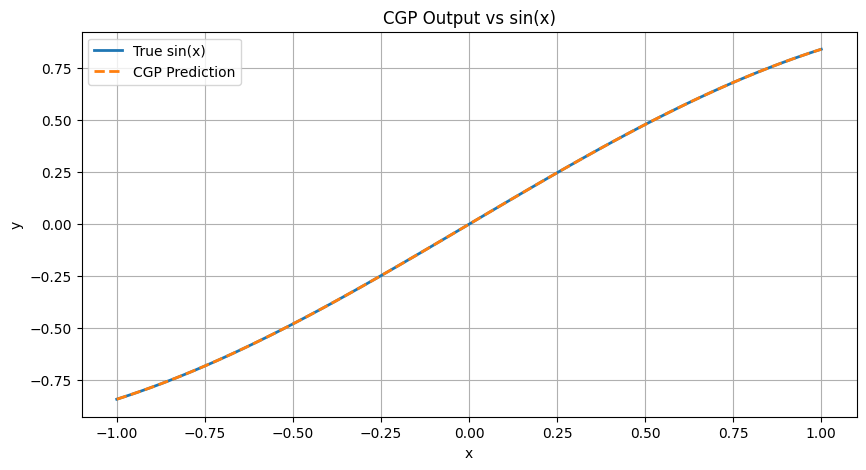

Fitness of best genome: 1.0


In [6]:
#See if the output fit the sin function

import matplotlib.pyplot as plt

def plot_sin_vs_prediction(evaluator, genome):
    inputs = evaluator.inputs
    targets = evaluator.targets

    predictions = [genome.get_value([x])[0] for x in inputs]

    plt.figure(figsize=(10, 5))
    plt.plot(inputs, targets, label='True sin(x)', linewidth=2)
    plt.plot(inputs, predictions, label='CGP Prediction', linestyle='--', linewidth=2)
    plt.title('CGP Output vs sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
print(best_genome.to_function_string())
plot_sin_vs_prediction(evaluator1, best_genome)
print(f"Fitness of best genome: {evaluator1.evaluate(best_genome)}")


         cap-shape  cap-surface    cap-color     bruises?         odor  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      2.491876     1.742984     4.323486     0.584441     4.788282   
std       0.901287     1.179629     3.444391     0.492848     1.983678   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.000000     0.000000     4.000000   
50%       2.000000     2.000000     3.000000     1.000000     6.000000   
75%       3.000000     3.000000     8.000000     1.000000     6.000000   
max       5.000000     3.000000     9.000000     1.000000     8.000000   

       gill-attachment  gill-spacing    gill-size   gill-color  stalk-shape  \
count      8124.000000   8124.000000  8124.000000  8124.000000  8124.000000   
mean          0.974151      0.161497     0.309207     4.729444     0.567208   
std           0.158695      0.368011     0.462195     3.342402     0.495493   
min           0.0

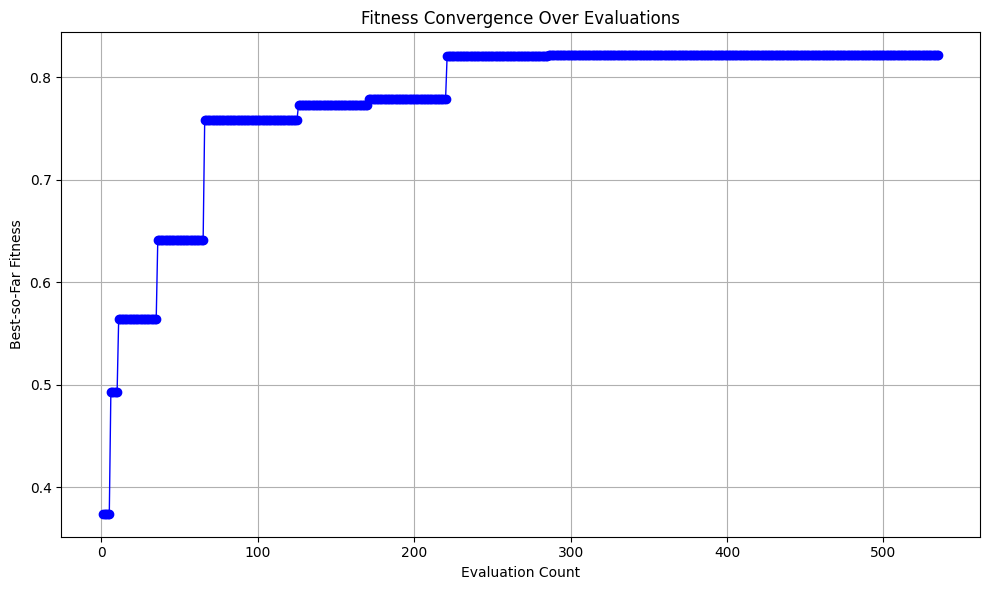

c:\Users\pauls\Bureau\Cours_2IS_M2\stage\pyCGP2.0\pycgp_finalclass\Genome.py:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


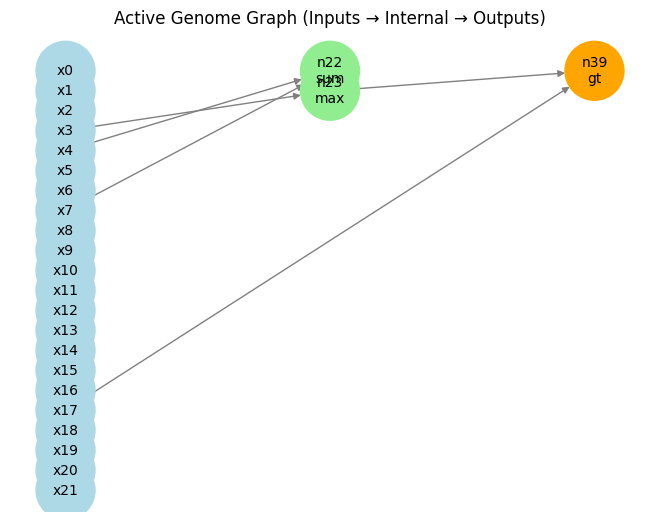

In [7]:
##WORK IN PROGRESS

from pmlb import fetch_data
from sklearn.preprocessing import MinMaxScaler

# Returns NumPy arrays
gametes = fetch_data('mushroom')
X, y = fetch_data('mushroom', return_X_y=True, local_cache_dir='./datasets')

print(gametes.describe())
# Conversion des colonnes en float
X = X.astype(float)
y = y.astype(float)

print(X)
print(y)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

evaluator2 = Binary_Classifier(X, y)

#Initialise config + Evaluator + mutation 
CGP_config = CGPConfig(num_inputs=X.shape[1], num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

#mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.5)
ES_cgp = ES(evaluator2, lam=5,parent = CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=50, verbose=True)

